In [1]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib import rcParams
from PIL import Image
import numpy as np

%matplotlib inline


In [2]:
# Preparation work
stop = stopwords.words('english')
# stop.append('theWordYouWantToGetRidOf')
stop = set(stop)

In [3]:
def common_words(tokens, num):
    return Counter(tokens).most_common(num)

In [4]:
# Import Data
# Constitution data found at: https://www.usconstitution.net/const.txt
f = open('const.txt')
text = f.read()

In [5]:
# Tokenize
tmp_toks = nltk.word_tokenize(text)
data = [w.lower() for w in tmp_toks]
common_words(data,5)

[('the', 726), (',', 586), ('of', 494), ('shall', 306), ('and', 264)]

In [6]:
# Clear stop words
data = [word for word in data if word not in stop]
common_words(data,5)

[(',', 586), ('shall', 306), ('.', 195), ('states', 129), ('president', 109)]

In [7]:
# Clear punctuation
data = [word for word in data if word not in punctuation]
common_words(data,5)

[('shall', 306),
 ('states', 129),
 ('president', 109),
 ('united', 85),
 ('state', 79)]

In [8]:
wordcloud = WordCloud().generate(text)

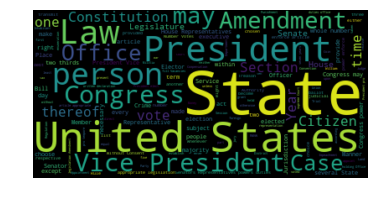

In [9]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
usa_coloring = np.array(Image.open('george.jpg'))

In [11]:
wc = WordCloud(background_color='white', 
               max_words=500, 
               max_font_size=60,
               mask=usa_coloring,
               stopwords=stop,  
               random_state=50)
wc.generate(text)

In [12]:
image_colors = ImageColorGenerator(usa_coloring)

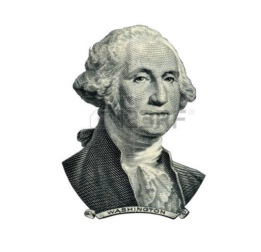

In [13]:
plt.imshow(usa_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.figure()



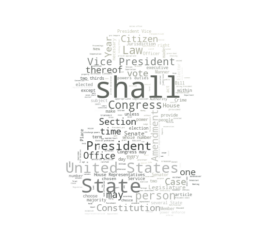

In [14]:
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()